# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [4]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [7]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
p = 60/100
q = 1 - p
print(f'''
    probabilidad de que sea manzana: {p}
    probabilidad de que sea naranja: {q}
''')



    probabilidad de que sea manzana: 0.6
    probabilidad de que sea naranja: 0.4



Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [5]:
# your code here
my_bernoulli = bernoulli(p)
my_bernoulli_20 = my_bernoulli.rvs(size = 20)
my_bernoulli_20

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [23]:
manzanas = p ** 5

print(f'La probabilidad de que las 5 primeras sean manzanas es de: {manzanas:.3f}')

manzanas_naranjas = p ** 5 * q ** 15

print(f'La probabilidad de que las 5 primeras sean manzanas y las 15 siguientes naranjas es de: {manzanas_naranjas}')

La probabilidad de que las 5 primeras sean manzanas es de: 0.078
La probabilidad de que las 5 primeras sean manzanas y las 15 siguientes naranjas es de: 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [12]:
# your code here
import math
N = 20

my_binomial = binom(N, p)

In [19]:

coef_binomial = math.factorial(N) / (math.factorial(5) * math.factorial(N - 5))
apples=5
# Calcular la probabilidad de obtener exactamente 5 manzanas en una muestra de 20 frutas
probabilidad_manzanas = coef_binomial * p**apples * (1-p)**(N-apples)

# Calcular la probabilidad de obtener exactamente 15 naranjas en una muestra de 20 frutas
probabilidad_naranjas = coef_binomial * p**(N-apples) * (1-p)**(N-(N-apples))

# Calcular la probabilidad conjunta de obtener 5 manzanas y 15 naranjas en una muestra de 20 frutas
probabilidad_total = probabilidad_manzanas * probabilidad_naranjas

print(f"La probabilidad de obtener exactamente 5 manzanas y 15 naranjas en una muestra de 20 frutas es {probabilidad_total:.4f}.")

La probabilidad de obtener exactamente 5 manzanas y 15 naranjas en una muestra de 20 frutas es 0.0001.


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [24]:
print(f"la probabilidad de que menos de 5 frutas de las 20 elegidas sean manzanas es de: {my_binomial.cdf(5):.3f}")

la probabilidad de que menos de 5 frutas de las 20 elegidas sean manzanas es de: 0.002


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [26]:
# your code here
# Please label the axes and give a title to the plot 
numero_manzanas = np.arange(1,N+1)
probabilidad = my_binomial.pmf(numero_manzanas)


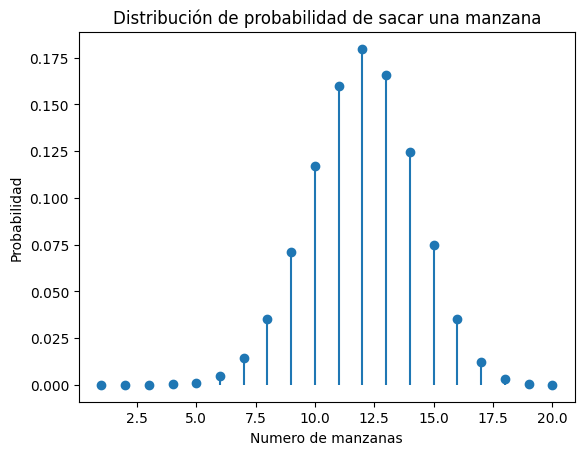

In [28]:
plt.plot(numero_manzanas, my_binomial.pmf(numero_manzanas), 'o')
plt.vlines(numero_manzanas, 0, probabilidad)
plt.title("Distribución de probabilidad de sacar una manzana")
plt.xlabel("Numero de manzanas")
plt.ylabel("Probabilidad");

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [29]:
average_goals = 2.3

my_poisson = poisson(mu = average_goals) 

In [31]:
goal = 5 
probabilidad_gol = (math.exp(-average_goals) * (average_goals**goal)) / math.factorial(goal)
print(f'la probabilidad de marcar 5 goles en un partido de UEFA es de: {probabilidad_gol:.3f}')

la probabilidad de marcar 5 goles en un partido de UEFA es de: 0.054


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [32]:
# your code here
# Please label the axes and give a title to the plot 
numero_goles = np.arange(0,11)
goles_marcados = my_poisson.pmf(numero_goles)


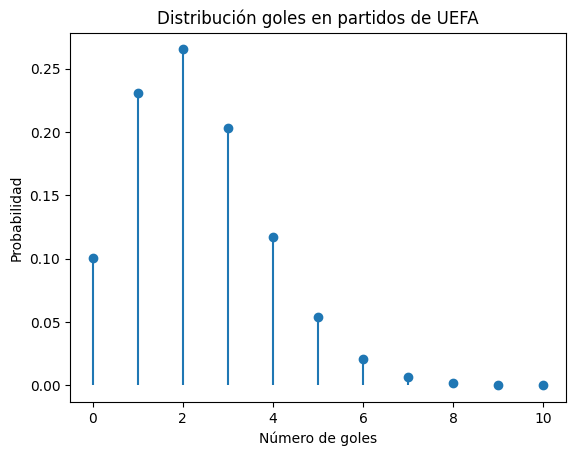

In [33]:
plt.plot(numero_goles, my_poisson.pmf(numero_goles), 'o')
plt.vlines(numero_goles, 0, goles_marcados)
plt.title("Distribución goles en partidos de UEFA")
plt.xlabel("Número de goles")
plt.ylabel("Probabilidad");